# COURSE: Master statistics and machine learning: Intuition, Math, code
##### COURSE URL: udemy.com/course/statsml_x/?couponCode=202006 
## SECTION: ANOVA
### VIDEO: One-way ANOVA (independent samples)
#### TEACHER: Mike X Cohen, sincxpress.com

In [3]:
# import libraries
import numpy as np
import matplotlib.pyplot as plt
import pingouin as pg
import pandas as pd

In [4]:
## data parameters

# group means
mean1 = 4
mean2 = 3.8
mean3 = 7

# samples per group
N1 = 30
N2 = 35
N3 = 29

# standard deviation (assume common across groups)
stdev = 2


In [5]:
## now to simulate the data
data1 = mean1 + np.random.randn(N1)*stdev
data2 = mean2 + np.random.randn(N2)*stdev
data3 = mean3 + np.random.randn(N3)*stdev

datacolumn = np.hstack((data1,data2,data3))

# group labels
groups = ['1']*N1 + ['2']*N2 + ['3']*N3

# convert to a pandas dataframe
df = pd.DataFrame({'TheData':datacolumn,'Group':groups})
df

,TheData,Group
0,2.551997,1
1,4.531638,1
2,2.754321,1
3,2.654755,1
4,3.633217,1
...,...,...
89,8.400128,3
90,8.323676,3
91,10.625345,3
92,7.061602,3


In [6]:
pg.anova(data=df,dv='TheData',between='Group')

,Source,ddof1,ddof2,F,p-unc,np2
0,Group,2,91,26.25539,9.957206e-10,0.365901


In [7]:
pg.pairwise_tukey(data=df,dv='TheData',between='Group')

,A,B,mean(A),mean(B),diff,se,T,p-tukey,hedges
0,1,2,3.539029,3.585788,-0.046759,0.519007,-0.090093,9.955353e-01,-0.022148
1,1,3,3.539029,6.939489,-3.400460,0.543222,-6.259795,3.728808e-08,-1.608602
2,2,3,3.585788,6.939489,-3.353701,0.523803,-6.402598,1.962314e-08,-1.588203


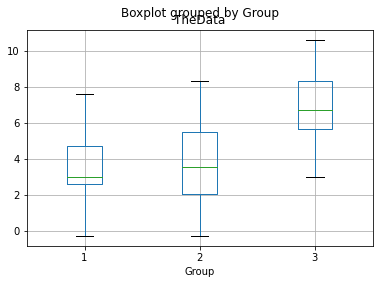

In [8]:
df.boxplot('TheData',by='Group');